## Logistic regression

Computing logistic regression using gradient descent for classification problems

#### Load training datasets and library imports

In [80]:
import os,sys
file_path = "../data/logistic_regression.json"
module_path = os.path.abspath(os.path.join('..', 'jantools'))

if module_path not in sys.path:
    sys.path.append(module_path)

import importlib
import pandas as pd
import numpy as np
import json
import classification as logreg
importlib.reload(logreg)

with open(file_path, "r") as f:
    data = json.load(f)

# Convert to NumPy arrays
x_1 = np.array([item["x1"] for item in data]).reshape(-1, 1)  # shape (n_samples, 1)
x_2 = np.array([item["x2"] for item in data]).reshape(-1, 1)
y = np.array([item["y"] for item in data])                  # shape (n_samples,)

#### janmltools logistical regression

In [81]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

alpha = 0.001

X_train = np.c_[x_1,x_2]

w,b, J_history,_ = logreg.gradient_descent(X_train ,y, initial_w, initial_b, alpha, 25000)

#### Scikit learn

In [82]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y)

y_pred = clf.predict(X_train)

#### Plotting training data sets with decision boundary

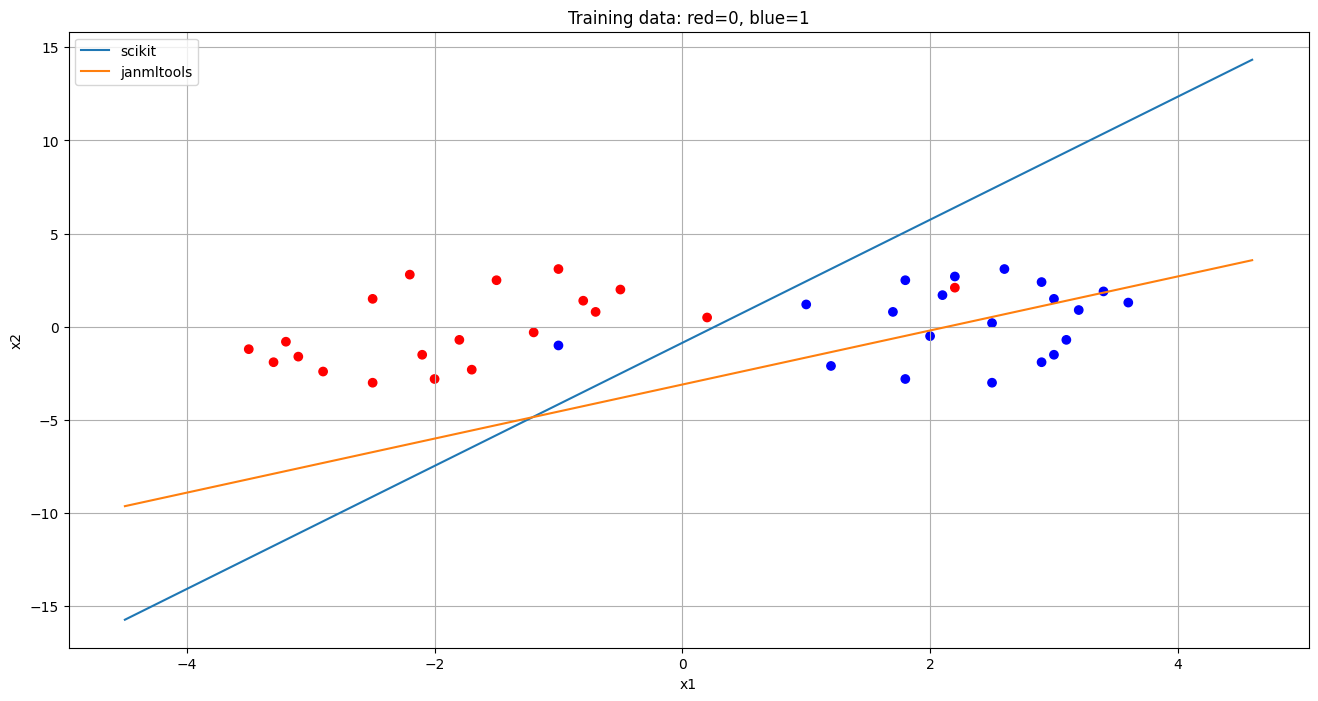

In [83]:
import matplotlib.pyplot as plt
colors = ['red' if label == 0 else 'blue' for label in y]

w_scikit = clf.coef_[0]       # [w1, w2]
b_scikit = clf.intercept_[0]  # bias

x_values = np.linspace(min(x_1)-1, max(x_1)+1, 100)
y_values = -(w_scikit[0] * x_values + b_scikit) / w_scikit[1]

plt.figure(figsize=(16,8))
plt.title('Training data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x_1, x_2, c=colors)
plt.plot(x_values,y_values,label="scikit")
plt.plot(x_values,w[0]*x_values+b,label="janmltools")
plt.title("Training data: red=0, blue=1")
plt.legend()
plt.grid(True)
plt.show()